### Solutions to Quiz 2 for Algorithms 2 (Monte Carlo Simulation)

#### Table of Contents <a name="toc">

- [**Question 4**](#q4)
    - [Generating Discharge Samples](#q41)
    - [Histogram of Discharge Samples](#q42)
    - [Number of Cups with Overfill](#q43)
    - [Discussion on the Slowness of For Loops](#q44)
- [**Question 5**](#q5)
    - [Generating Daily Consumption Data](#q51)
    - [Histogram of Consumption Data](#q52)
    - [Probability that Water Runs Out](#q53)
    - [For Loop Comparison](#q54)

In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

### Question 4 <a name="q4">

A coffee machine is regulated so that it discharges an average of `200 milliliters` per cup. If the amount of drink is `normally distributed` with a standard deviation equal to `15 milliliters`, how many cups will probably overflow if `220-milliliter` cups are used for the next `500 drinks`?

NOTE: Please provide answers up to 2 decimal places.

#### Generating Discharge Samples <a name="q41">

In [2]:
# given the following values from the problem
n_samples = 500
overflow_limit = 220
mean_discharge = 200
std_discharge = 15

# assuming 1e6 number of runs for the simulation
n_runs = 1000000

# given the values for mean and standard deviation
# and using n_runs to get a range of values from a normal distribution curve
# we get a sample of discharge volumes
discharge_samples = np.random.normal(mean_discharge, std_discharge, n_runs)

#### Histogram of Discharge Samples <a name="q42">

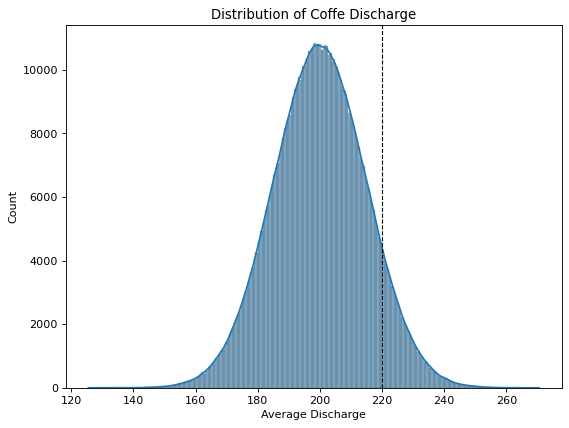

In [3]:
# plotting the histogram of the discharge samples
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(discharge_samples, kde=True)
plt.ylabel("Count")
plt.xlabel("Average Discharge")
plt.title("Distribution of Coffe Discharge")
plt.axvline(overflow_limit, color='k', linestyle='dashed', linewidth=1)
plt.show()

#### Number of Cups with Overfill <a name="q43">

The problem calls for the number of cups that will overflow for the next 500 drinks. Hence, the solution to that would be to find the area under the curve to the right of the vertical line in the plot above and multiply it by 500. But the above line is not an exact normal distribution curve. It approximates it, yes, but the plot above was generated using the values from `discharge_samples`. Thus the correct way to find the percentage of samples above the `overflow_limit` and use that percentage and multiply it to the sample size.

In [4]:
%%time
# get the percentage of samples using np.mean directly
percent_above_limit = np.mean(discharge_samples > overflow_limit)

CPU times: user 2.77 ms, sys: 103 µs, total: 2.87 ms
Wall time: 1.59 ms


In [5]:
%%time
# get the percentage of samples using np.greater wrapped in np.mean
percent_above_limit2 = np.mean(np.greater(discharge_samples, overflow_limit))

CPU times: user 2.5 ms, sys: 0 ns, total: 2.5 ms
Wall time: 1.83 ms


In [6]:
print("The percentage of overflows is {:.2f} %".format(percent_above_limit2 * 100))

The percentage of overflows is 9.12 %


In [7]:
print("The number of cups overflowing in the next {} fills is approximately {:.2f}".format(n_samples, n_samples*percent_above_limit))

The number of cups overflowing in the next 500 fills is approximately 45.62


#### Discussion on the Slowness of For Loops <a name="q44">

**Note** The `percent_above_limit` can also be obtained using a for loop. 

In [8]:
%%time
counter = 0
for i in discharge_samples:
    if i > overflow_limit: 
        counter += 1
        
percent_above_limit3 = counter/n_runs

CPU times: user 392 ms, sys: 258 µs, total: 393 ms
Wall time: 394 ms


In [9]:
print("The percentage of overflows is {:.2f} %".format(percent_above_limit3 * 100))

The percentage of overflows is 9.12 %


But, as can be seen, the for loop implementation runs more than `100 times` slower than the vectorized approach. 

[back to top](#toc)

### Question 5

In a certain city, the daily consumption of water (in millions of liters) follows approximately a `gamma distribution` with `α = 2` and `β = 3`. If the daily capacity of that city is `9 million liters` of water, what is the probability that on any given day the water supply is inadequate?

**NOTE:** The expected answer is in % form with up to `2 decimal places`. **DO NOT** put the % in the input box. If you get 0.5321 as answer, then write 53.21 in the input box.

#### Generating Daily Consumption Data <a name="q51">

In [10]:
# given 
alpha = 2
beta = 3
capacity = 9e6

n_runs2 = 1000000

# using the above values for a gamma distribution
# n_runs2 of samples for the daily consumption was generated
daily_consumption_samples = np.random.gamma(alpha, 1/beta, n_runs2) * capacity

#### Histogram of Consumption Data <a name="q52">

In [11]:
# define a helper function for x_tick formatting
def millions_formatter(x, pos):
    return f'{x / 1000000}M'

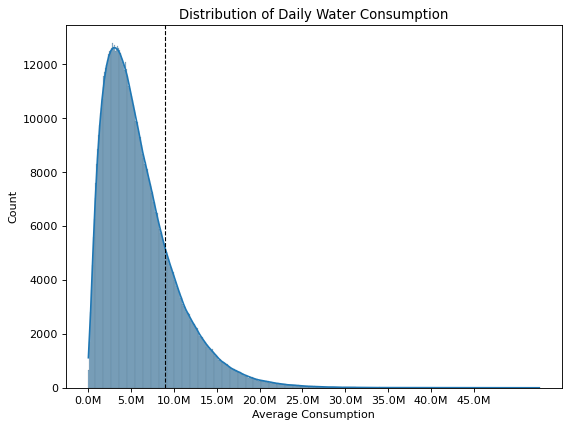

In [12]:
# plotting the histogram of the daily consumption samples
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
sns.histplot(daily_consumption_samples, kde=True)
plt.ylabel("Count")
plt.xlabel("Average Consumption")
plt.title("Distribution of Daily Water Consumption")
plt.axvline(capacity, color='k', linestyle='dashed', linewidth=1)
plt.xticks(np.arange(0, 50e6, 5e6))
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

#### Probability that Water Runs Out <a name="q53"><a name="q51">

This problem calls for the probability that, on a given day, the city runs out of water. In the histogram above, it is the area to the right. To get that, we obtain the number of days out of `n_runs2` where the water consumption goes beyond the `capacity` and divide it by `n_runs2`.

In [13]:
%%time
# get the probability using np.mean directly
probability_water_runs_out = np.mean(daily_consumption_samples > capacity)

CPU times: user 2.4 ms, sys: 62 µs, total: 2.46 ms
Wall time: 1.58 ms


In [14]:
print("The probability that water runs out for a given day is {:.2f} %".format(probability_water_runs_out * 100))

The probability that water runs out for a given day is 19.89 %


#### For Loop Comparison <a name="q54">

Showing the `for loop` implementation. 

In [15]:
%%time
counter2 = 0
for j in daily_consumption_samples:
    if j > capacity: 
        counter2 += 1
        
probability_water_runs_out2 = counter2/n_runs2

CPU times: user 230 ms, sys: 32 µs, total: 230 ms
Wall time: 228 ms


In [16]:
print("The probability that water runs out for a given day is {:.2f} %".format(probability_water_runs_out2 * 100))

The probability that water runs out for a given day is 19.89 %


Again, the `for loop` runs slower.

[back to top](#toc)

--end-- <a name="end">